<a href="https://colab.research.google.com/github/Ali-Asgar-Lakdawala/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:
* X6 = the repayment status in September, 2005; 
* X7 = the repayment status in August, 2005; . . .;
* X11 = the repayment status in April, 2005.

 The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, plot_precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel('https://github.com/Ali-Asgar-Lakdawala/Credit-Card-Default-Prediction/blob/main/default%20of%20credit%20card%20clients.xls?raw=true',header = 1)

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Functions

In [4]:
# making a function to train the model and evaluate the model
def train_and_score (model,X_test,X_train,y_test,y_train, best_parameter=True, best_score=True):
  '''
  train the model and gives mse,rmse,r2,adj r2 score of the model
  can be used for any model where y is not transformed 
  '''

  start=time.time()
  #training the model
  model.fit(X_train,y_train)
  stop = time.time()

  time_min=round((stop - start)/60,4)
  print(f"Training time: {time_min}min")
  

  # finding the best parameters of the model if any 
  if best_parameter==True:
    try:
      # finding the best parameters of the model if any 
      print("The best parameters found out to be :" ,model.best_params_)
    except:
      pass

  if best_score==True:
    try:
      print(" \nwhere negative mean squared error is: ", model.best_score_,'\n')
    except:
      pass


  #predicting the values of y from x via model
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  test_accuracy = accuracy_score(y_pred_test,y_test)
  test_precision = precision_score(y_pred_test,y_test)
  test_recall = recall_score(y_pred_test,y_test)
  test_f1 = f1_score(y_pred_test,y_test)
  test_roc= roc_auc_score(y_pred_test,y_test)
  print("The accuracy on test data is ", test_accuracy)
  print("The precision on test data is ", test_precision)
  print("The recall on test data is ", test_recall)
  print("The f1 on test data is ", test_f1)

  # print('classification_report of training set')
  # print("-"*80)
  # print(classification_report(y_train,y_pred_train))
  # print('classification_report of ttesting set')
  # print("-"*80)
  # print(classification_report(y_test,y_pred_test))

In [5]:
def age_group(x):
  if x in range(1,30):
    return '1_29'
  elif x in range(30,40):
    return '30_39'
  elif x in range(40,50):
    return '40_49'
  elif x in range(50,60):
    return '50_59'
  else:
    return '60_&_above'

In [78]:
def feature_importances_graph (model,dependent_variable):
  '''
  shows the graph of feature importance
  '''
  features = df.drop(dependent_variable,axis=1).columns
  importances = model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(10,40))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')
  

  plt.show()


In [81]:
pip install lime

     |████████████████████████████████| 275 kB 7.0 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=d30aff4e2febb7958b03688ebb187ce6fcb8c6567097ea0bcbe2bc9b1968e5ac
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [82]:
# LIME SECTION

import lime
import lime.lime_tabular
def LimeTabularExplainer_table(model,instance,num_features,dependent_var):
  
  X=final_df.drop('trip_duration',axis=1)
  feature_names =list(final_df.drop('trip_duration',axis=1).columns)

  explainer = lime.lime_tabular.LimeTabularExplainer(X.values,feature_names=feature_names,mode='regression')

  # selecting the instace to explain
  choosen_instance = X.reset_index(drop=True).loc[[instance]].values[0]
  exp = explainer.explain_instance(choosen_instance, model.predict, num_features=num_features)
  exp.show_in_notebook(show_table=True)


# Dataset inspection

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [8]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [9]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# univariate analysis

In [10]:
#changing the names of columns
df.rename(columns={'default payment next month' : 'Is_Defaulter','PAY_0': 'PAY_1'}, inplace=True)

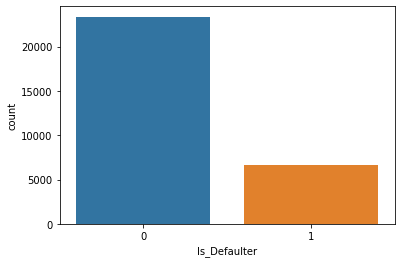

In [11]:
sns.countplot(df['Is_Defaulter'])

this data set is quite imbalance with defaulter as only 22 percent 

# Bivariate Analysis

## Sex

In [12]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE','Is_Defaulter']
df_cat = df[categorical_features]

In [13]:
df_cat.replace({'SEX': {1 : 'Male', 2 : 'Female'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others',}, 'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)

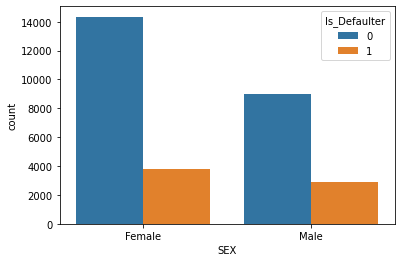

In [14]:
sns.countplot(x = 'SEX', hue = 'Is_Defaulter', data = df_cat)

In [15]:
df.groupby('SEX').mean()['Is_Defaulter']

SEX
1    0.241672
2    0.207763
Name: Is_Defaulter, dtype: float64

observation
* no of women are more than no of men 
* male are more likely to default than women 

## Education

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

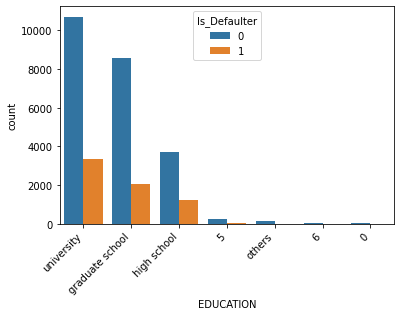

In [16]:
sns.countplot(x = 'EDUCATION', hue = 'Is_Defaulter', data = df_cat)
plt.xticks(rotation=45,horizontalalignment='right')

In [17]:
df_cat.replace({'EDUCATION' : {5 : 'others', 6 : 'others', 0 : 'others'}},inplace=True)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

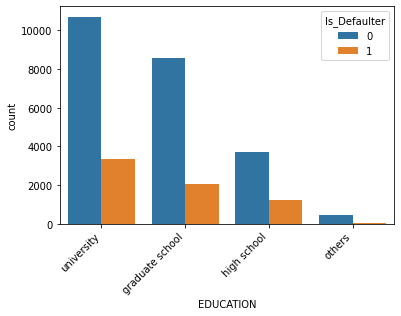

In [18]:
sns.countplot(x = 'EDUCATION', hue = 'Is_Defaulter', data = df_cat)
plt.xticks(rotation=45,horizontalalignment='right')

In [19]:
df_cat[['Is_Defaulter','EDUCATION']].groupby('EDUCATION').mean().reset_index()

,EDUCATION,Is_Defaulter
0,graduate school,0.192348
1,high school,0.251576
2,others,0.070513
3,university,0.237349


obsevation
* category 5,6 and 0 are undocumented which might be of lower education or no education we can convert them to others 
* high school eduacated people are more likely to default

## Marriage

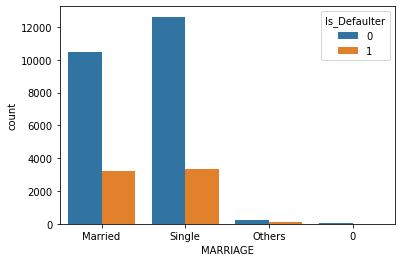

In [20]:
sns.countplot(x = 'MARRIAGE', hue = 'Is_Defaulter', data = df_cat)

In [21]:
df_cat.replace({'MARRIAGE' : {0 : 'Others'}},inplace=True)

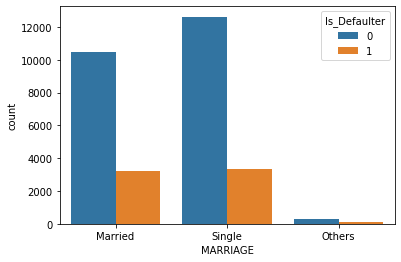

In [22]:
sns.countplot(x = 'MARRIAGE', hue = 'Is_Defaulter', data = df_cat)

In [23]:
df_cat[['Is_Defaulter','MARRIAGE']].groupby('MARRIAGE').mean().reset_index()

,MARRIAGE,Is_Defaulter
0,Married,0.234717
1,Others,0.236074
2,Single,0.209283


observation
* MARRIAGE has a label 0 that is undocumented which can be converted to others
* married and others are more likely to default

## Age

In [24]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df.select_dtypes(include=numerics)

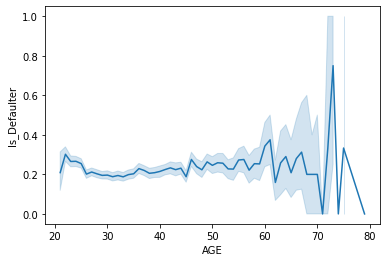

In [25]:
sns.lineplot(x='AGE',y='Is_Defaulter',data=df_num)

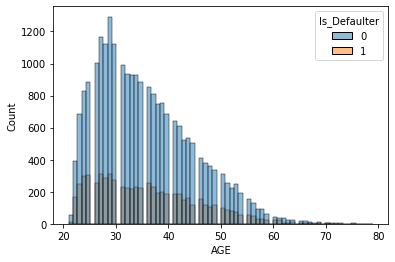

In [26]:
sns.histplot(x='AGE', hue='Is_Defaulter',data=df_num)

In [27]:
df_num['age_group']=df_num['AGE'].apply(lambda x: age_group(x))

In [28]:
df_num[['Is_Defaulter','age_group']].groupby('age_group').mean().reset_index()

,age_group,Is_Defaulter
0,1_29,0.228426
1,30_39,0.202527
2,40_49,0.229734
3,50_59,0.248612
4,60_&_above,0.283186


observation
* as the age increases the number of defaulters also increases

In [29]:
pay_df=df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

In [30]:
pay_df.describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


observation

* payment months has a label 0 that is undocumented
* -2 might mean that payment is payed before time or payed duly so we can convert this -2,-1 to 0 as payed duly

In [31]:
bill_amt_df=df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]

In [32]:
bill_amt_df.describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


observation 
* -ve values can be of credit

---
# Feature engineering
---

In [33]:
#converting the outlers to relavent labels
# replacing male(1) to 0 and female(2) to 1
df.replace({'SEX': {1 : 0, 2 : 1}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others',5 : 'others', 6 : 'others', 0 : 'others',}, 'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others', 0 :'Others'}}, inplace = True)

In [34]:
df.EDUCATION.value_counts()

university         14030
graduate school    10585
high school         4917
others               468
Name: EDUCATION, dtype: int64

In [35]:
df['MARRIAGE'].value_counts()

Single     15964
Married    13659
Others       377
Name: MARRIAGE, dtype: int64

In [36]:
df['age_group']=df['AGE'].apply(lambda x: age_group(x))

In [37]:
df = pd.get_dummies(df,columns=['EDUCATION','MARRIAGE','age_group'])

In [38]:
df=df.drop('ID',axis=1)

In [39]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Is_Defaulter',
       'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_others', 'EDUCATION_university', 'MARRIAGE_Married',
       'MARRIAGE_Others', 'MARRIAGE_Single', 'age_group_1_29',
       'age_group_30_39', 'age_group_40_49', 'age_group_50_59',
       'age_group_60_&_above'],
      dtype='object')

In [40]:
df.head()

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Is_Defaulter,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_Married,MARRIAGE_Others,MARRIAGE_Single,age_group_1_29,age_group_30_39,age_group_40_49,age_group_50_59,age_group_60_&_above
0,20000,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0
1,120000,1,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,1,0,0,1,1,0,0,0,0
2,90000,1,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,0,0,1,0,0,1,0,1,0,0,0
3,50000,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,0,0,1,1,0,0,0,1,0,0,0
4,50000,0,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,0,0,1,1,0,0,0,0,0,1,0


In [41]:
df.shape

(30000, 34)

In [42]:
def remove_lables (x):
  if x <=0:
    x = 0
  elif x > 3:
    x = 3
  return x

In [43]:
# df.PAY_1=df.PAY_1.apply(lambda x: remove_lables(x))
# df.PAY_2=df.PAY_2.apply(lambda x: remove_lables(x))
# df.PAY_3=df.PAY_3.apply(lambda x: remove_lables(x))
# df.PAY_4=df.PAY_4.apply(lambda x: remove_lables(x))
# df.PAY_5=df.PAY_5.apply(lambda x: remove_lables(x))
# df.PAY_6=df.PAY_6.apply(lambda x: remove_lables(x))

description of pay_df
* 0 means payed duly
* 1 payment delay for one month
* 2 payment delay for two month
* 3 payment delay for three or more month

In [44]:
PAY={'PAY_1':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'}
BILL={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}
PAY_AMT={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'}

In [45]:
df.rename(columns=PAY,inplace=True)
df.rename(columns=BILL, inplace = True)
df.rename(columns=PAY_AMT,inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   LIMIT_BAL                  30000 non-null  int64
 1   SEX                        30000 non-null  int64
 2   AGE                        30000 non-null  int64
 3   PAY_SEPT                   30000 non-null  int64
 4   PAY_AUG                    30000 non-null  int64
 5   PAY_JUL                    30000 non-null  int64
 6   PAY_JUN                    30000 non-null  int64
 7   PAY_MAY                    30000 non-null  int64
 8   PAY_APR                    30000 non-null  int64
 9   BILL_AMT_SEPT              30000 non-null  int64
 10  BILL_AMT_AUG               30000 non-null  int64
 11  BILL_AMT_JUL               30000 non-null  int64
 12  BILL_AMT_JUN               30000 non-null  int64
 13  BILL_AMT_MAY               30000 non-null  int64
 14  BILL_AMT_APR          

In [47]:
df = pd.get_dummies(df,columns=['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR'])

In [48]:
df=df.drop('AGE',axis=1)

In [49]:
df.shape

(30000, 91)

In [50]:
X = df.drop(['Is_Defaulter'],axis=1)
y = df['Is_Defaulter']

In [51]:
X.shape

(30000, 90)

In [52]:
y.shape

(30000,)

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [55]:
df['Is_Defaulter'].value_counts()

0    23364
1     6636
Name: Is_Defaulter, dtype: int64

In [56]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X, y)

In [57]:
(unique, counts) = np.unique(y_smote, return_counts=True)
np.asarray((unique, counts)).T

array([[    0, 23364],
       [    1, 23364]])

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.25,random_state=0)

# Logestic Regrestion

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
log_reg = LogisticRegression()

In [61]:
param_dict = {'C': [0.001,0.01,0.1,1,10,100],'penalty': ['l1', 'l2'],'max_iter':[1000]} 

In [62]:
log_reg_grid = GridSearchCV(log_reg, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='accuracy') 

In [63]:
train_and_score(log_reg_grid, X_test, X_train, y_test, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   16.2s finished


Training time: 0.2765min
The best parameters found out to be : {'C': 0.001, 'max_iter': 1000, 'penalty': 'l2'}
 
where negative mean squared error is:  0.706072119624473 

The accuracy on test data is  0.7056154768019175
The precision on test data is  0.5803223070398643
The recall on test data is  0.7799817601459188
The f1 on test data is  0.6654994650325844


---
# Desision Tree
---

In [65]:
from sklearn.tree import DecisionTreeClassifier
# creating DecisionTree model
DecisionTree = DecisionTreeClassifier()

# training and evaluating the DecisionTree
train_and_score(DecisionTree,X_train, X_test, y_train, y_test)

Training time: 0.0049min
The accuracy on test data is  0.7057010785824345
The precision on test data is  0.7165264182265728
The recall on test data is  0.700095083617652
The f1 on test data is  0.7082154577345253


---
# Random forest
---

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
# max_depth = 15, n_estimators=100

In [87]:
# creating Random Forest Regressor model
rfc=RandomForestClassifier()

In [69]:
# training and evaluating the Random Forest Regressor
train_and_score(rfc,X_train, X_test, y_train, y_test,best_parameter=True)

Training time: 0.0408min
The accuracy on test data is  0.8020030816640986
The precision on test data is  0.7614059190566146
The recall on test data is  0.8275883524141364
The f1 on test data is  0.7931188694433678


## implimenting grid search random forest
---

In [88]:
# creating RandomForestRegressor model
rfc=RandomForestClassifier()

In [118]:
# finding the best parameters for knn_model by gridsearchcv
grid_values_rf = {'n_estimators': [150,200,250],'max_depth': [35,40,50],'criterion': ['entropy']}
rfc_grid = GridSearchCV(estimator=rfc,param_grid = grid_values_rf, scoring='accuracy',cv=3,verbose=5,n_jobs=-1)

In [119]:
# training and evaluating the Random Forest Regressor
train_and_score(rfc_grid,X_train, X_test, y_train, y_test)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  2.8min finished


Training time: 2.9937min
The best parameters found out to be : {'criterion': 'entropy', 'max_depth': 50, 'n_estimators': 250}
 
where negative mean squared error is:  0.7890772128060264 

The accuracy on test data is  0.8066541117388575
The precision on test data is  0.7682179861468887
The recall on test data is  0.8311141388493218
The f1 on test data is  0.7984293193717276


In [121]:
rfc_grid.best_score_

0.7890772128060264

---
#XGboost
---

In [122]:
from xgboost import XGBClassifier

In [123]:
# creating XGBRegressor model
xgbc=XGBClassifier()

In [124]:
# training and evaluating the xgb_grid
train_and_score(xgbc,X_train, X_test, y_train, y_test)

Training time: 0.0463min
The accuracy on test data is  0.793100496490327
The precision on test data is  0.7081115118209399
The recall on test data is  0.8518110453105633
The f1 on test data is  0.7733425025788503


## implimenting grid search xgb
---

In [127]:
# finding the best parameters for XGBRegressor by gridsearchcv
xgbc_param={'n_estimators': [150,200,250],'max_depth': [40,50,100],'criterion': ['entropy']}
xgbc_grid=GridSearchCV(estimator=xgbc,param_grid=xgbc_param,cv=3,scoring='accuracy',verbose=5,n_jobs=-1)

In [128]:
# training and evaluating the xgb_grid
train_and_score(xgbc_grid,X_train, X_test, y_train, y_test)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 10.4min finished


Training time: 11.4434min
The best parameters found out to be : {'criterion': 'entropy', 'max_depth': 50, 'n_estimators': 250}
 
where negative mean squared error is:  0.8246875535011128 

The accuracy on test data is  0.8393825258232038
The precision on test data is  0.8110366935714695
The recall on test data is  0.8588748787584869
The f1 on test data is  0.8342705726483145
